In [198]:
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import re
import matplotlib.pyplot as plt

In [199]:
with open("raw_course_data_2.xml") as cdata:
    s = "".join(cdata.readlines())
    tree = BeautifulSoup(s)

In [200]:
rows = []
for dep in tree.findAll("courses"):
    for course in dep.findAll("course"):
        rows.append({
            "code": getattr(course.find("code"), "string", None),
            "name": getattr(course.find("name"), "string", None),
            "credits": getattr(course.find("credits"), "string", None),
            "credit-structure": getattr(course.find("credit-structure"), "string", None),
            "pre-requisites": getattr(course.find("pre-requisites"), "string", None),
            "overlap": getattr(course.find("overlap"), "string", None),
            "department": dep.get("department"),
            "description": getattr(course.find("description"), "string", None)
        })
        i += 1
        
df = pd.DataFrame(rows)

In [201]:
df.head()

,code,name,credits,credit-structure,pre-requisites,overlap,department,description
0,APL100,Engineering Mechanics,4,3-1-0,None,None,Department of Applied Mechanics,"Kinematics, Statics, Equations of Motion, Rigi..."
1,APL101,Applied Mathematics in Engineering Applications,3,3-0-0,None,None,Department of Applied Mechanics,ordinary Differential Equation: Second order o...
2,APL102,Introduction to Materials Science and Engineering,4,3-0-2,None,None,Department of Applied Mechanics,Structure of Solids: atomic and inter-atomic b...
3,APL103,Experimental Methods,4,3-0-2,None,None,Department of Applied Mechanics,Experimental Analysis: Types of measurements a...
4,APL104,Solid Mechanics,4,3-1-0,APL100,"APL105, APL108",Department of Applied Mechanics,"Introduction, State of stress at a point, equa..."


In [202]:
df.loc[df['code'] == "COL106"]

,code,name,credits,credit-structure,pre-requisites,overlap,department,description
553,COL106,Data Structures and Algorithms,5,3-0-4,COL100,None,Department of Computer Science and Engineering,Introduction to object-oriented programming th...


In [203]:
odd_sem = pd.read_csv("1_2122.csv")
even_sem = pd.read_csv("2_2122.csv")

In [204]:
odd_sem['code'] = odd_sem['Course Name'].str.split(pat="-").str[-1].str.extract("([A-Z]{3}[0-9]{3})")
even_sem['code'] = even_sem['Course Name'].str.split(pat="-").str[-1].str.extract("([A-Z]{3}[0-9]{3})")

In [205]:
odd_sem.head()

,S.No,Course Name,Slot Name,Units,Type,Instructor,Instructor Email,Lecture Time,Tutorial Time,Practical Time,Vacancy,Current Strength,code
0,1,MAJOR PROJECT-AMD895,P,0.0-0.0-80.0,NaN,ARGHYA SAMANTA,arghya@am.iitd.ac.in,NaN,NaN,NaN,60,0,AMD895
1,2,DESIGN PROJECT-AMD899,X,0.0-0.0-20.0,NaN,VENKATA ADITYA,dvenkat@am.iitd.ac.in,NaN,NaN,NaN,60,25,AMD899
2,3,ENGG. MATHEMATICS & MECHANICS-AML701,F,3.0-0.0-0.0,NaN,VAMSI KRISHNA CHALAMALLA,vchalama@am.iitd.ac.in,TThF 11:00-12:00,NaN,NaN,90,25,AML701
3,4,APPLIED FLUID DYNAMICS-AML713,J,3.0-1.0-0.0,NaN,ANUPAM DEWAN,adewan@am.iitd.ac.in,MTF 12:00-13:00,NaN,NaN,90,32,AML713
4,5,SOLID MECHANICS-AML732,E,3.0-0.0-0.0,NaN,SOUVIK CHAKRABORTY,souvik@am.iitd.ac.in,TWF 10:00-11:00,NaN,NaN,60,22,AML732


In [206]:
df['sem'] = df['code'].isin(odd_sem['code']).astype(int) + 2*(df['code'].isin(even_sem['code']).astype(int))

In [207]:
df.head()

,code,name,credits,credit-structure,pre-requisites,overlap,department,description,sem
0,APL100,Engineering Mechanics,4,3-1-0,None,None,Department of Applied Mechanics,"Kinematics, Statics, Equations of Motion, Rigi...",3
1,APL101,Applied Mathematics in Engineering Applications,3,3-0-0,None,None,Department of Applied Mechanics,ordinary Differential Equation: Second order o...,1
2,APL102,Introduction to Materials Science and Engineering,4,3-0-2,None,None,Department of Applied Mechanics,Structure of Solids: atomic and inter-atomic b...,0
3,APL103,Experimental Methods,4,3-0-2,None,None,Department of Applied Mechanics,Experimental Analysis: Types of measurements a...,3
4,APL104,Solid Mechanics,4,3-1-0,APL100,"APL105, APL108",Department of Applied Mechanics,"Introduction, State of stress at a point, equa...",3


ELL305: ['ELL201']
ELP305: []
MTL102: []
MTL103: []
MTL104: ['MTL101']
MTL105: []
MTL106: []
MTL107: []
MTL122: ['MTL100']
MTL180: []
MTP290: ['MTL101']
MTL342: ['MTL180']
MTL390: ['MTL106']
MTD421: ['EC 100']
MTL411: ['MTL104', 'MTL122']
MTL712: ['MTL107']
MTL458: ['MTL342']


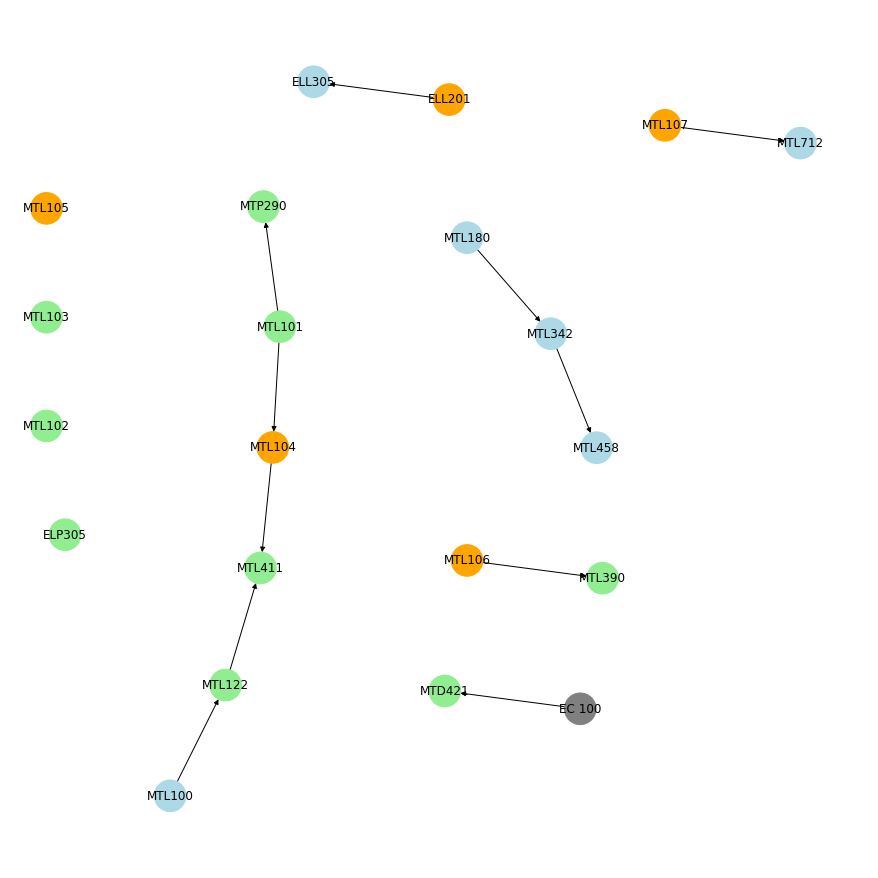

In [208]:
#cs1_dc = ["COL106","COL202","COL215","COL216","COL226","COP290","COL331","COL333","COL334","COL351","COL352","COL362","COL380","COD492"]
#cs1_dc = ["ELL201","ELL202","ELL203","ELP203","ELL205","ELL211","ELL212","ELP212","ELL225","ELP225","ELL302","ELP302","ELL303","ELP303","ELL304","ELL305","ELP305","ELL311","ELP311"]
cs1_dc = ["ELL305","ELP305","MTL102","MTL103","MTL104","MTL105","MTL106","MTL107","MTL122","MTL180","MTP290","MTL342","MTL390","MTD421","MTL411","MTL712","MTL458"]
color_map = []

color_dict = ["grey", "lightblue", "lightgreen", "orange"]

G = nx.DiGraph()
G.add_nodes_from(cs1_dc, style='filled')
for course in cs1_dc:
    course_data = df.loc[(df['code'] == course)]
    prereqs = course_data.iloc[0]['pre-requisites']
    prereqlist = [] if prereqs is None else [x.strip() for x in prereqs.split(',')]
    print(f"{course}: {prereqlist}")
    for pr in prereqlist:
        G.add_edge(pr, course)
        
for node in G:
    course_data = df.loc[(df['code'] == node)]
    color = course_data.iloc[0]['sem'] if node != "EC 100" else 0
    color_map.append(color_dict[color])
    G.nodes[node]['fillcolor'] = color_dict[color]

from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
plt.figure(figsize=(12,12)) 
nx.draw(G, pos=pos, node_size=1000, node_color=color_map, with_labels=True)
write_dot(G, 'cs1_out.dot')
# pos=nx.spring_layout(G, k=0.15, iterations=20)
# nx.draw(G, pos, with_labels=True)


In [209]:
df.loc[df['code'] == "MTL712"]

,code,name,credits,credit-structure,pre-requisites,overlap,department,description,sem
1551,MTL712,Computational Methods for Differential Equations,4,3-0-2,MTL107,None,Department of Mathematics,Numerical methods for solving IVPs for oDEs: D...,1
